In [1]:
### everything below is wrote by Daniel Yang
### everything else in this folder was written by GitHub user miri64 
### as a python wrapper for comicvine.org
### see README for more information

In [2]:
# module written by GitHub user miri64 that extracts information from comicvine.com by its API 
import pycomicvine

from PIL import Image

# used for extracting image from an URL
import requests
from io import BytesIO

import matplotlib.pyplot as plt 
import numpy as np

# setting up delay so rate limit is not exceeded on comicvine.com
import time

# distinct api_key per user inorder to access API resources on comicvine.com
pycomicvine.api_key = "9cfff9ee1a40f2cb139e6cc37697ff0902b8df84"

In [3]:
# crop image to the largest square starting from the top middle
# input: image that you are cropping
# return: cropped image with the the largest square left
def cropping(img):
    w, h = img.size
    left = right = top = bottom = 0
    if (w > h):
        mid = w // 2
        top = 0
        bottom = h - 1
        left = mid - h//2
        right = mid + h//2
    else:
        left = 0
        right = w - 1
        top = 0
        bottom = w - 1
    return img.crop((left, top, right, bottom))

In [ ]:
# scraping superman images based on volume ID on comicvine.org
# we will save four cover images in the directory per comic book cover
# 1)cover with size 256x256   2)cover with size 256x256 but horizontally flipped
# 1)cover with size 128x128   4)cover with size 128x128 but horizontally flipped

# a list of Superman volume IDs that I found manually from comicvine.com
volume =  [18005,                     # action comics  
           773, 3816, 42986,          # superman vol1-3
           3105, 19154,               # adv comics, superboy (4,5)
           3778, 45772, 19172,        # adv of superman, norwegian, jimmy_olsen (6-8)
           6554, 4571, 19245,64304,   # supacomic, man of steel, louis lane, superboy2 (9-11)
           103037, 10938, 2943, 43315 # supermanClassic, super_bat, dc_comic_present, brazillian (12-15)
          ]             

len_vol = len(volume)
prefix_128_temp = '/comic_image/128x128/superman_128_'
prefix_256_temp = '/comic_image/256x256/superman_256_'

# variable used for delay
z = 0

# looping through each volume id 
for i in range(0, len_vol):
    vol = pycomicvine.Volume(volume[i])
    
    # get a list of issues in that volume
    issues = vol.issues
    len_iss = len(issues)
    
    prefix_128 = prefix_128_temp + str(i) + '-'
    prefix_256 = prefix_256_temp + str(i) + '-'
    
    # iterate through each issue in the issues
    for j in range(0, len_iss):
        
        # rest for 6.5 seconds after requesting 8 times from comicvine.org 
        # to avoid exceeding comicvine rate limit
        z += 1
        if z % 8 == 0:
            z = 0
            time.sleep(6.5)
        
        # set up directory and name of the saved image
        direc_128 = prefix_128 + str(j) + '.jpg'
        direc_128_f = prefix_128 + str(j) + '_f.jpg'
        direc_256 = prefix_256 + str(j) + '.jpg'
        direc_256_f = prefix_256 + str(j) + '_f.jpg'
        
        issue = issues[j]
        
        # get the issue cover image from URl then convert it to RGB
        url = issue.image['medium_url']
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img = img.convert('RGB')
        
        # get the 4 images
        img = cropping(img)
        img1 = img.resize((128,128))
        img1f = img1.transpose(Image.FLIP_LEFT_RIGHT)
        img2 = img.resize((256,256))
        img2f = img2.transpose(Image.FLIP_LEFT_RIGHT)
        
        # save the 4 images
        img1.save(direc_128, 'JPEG')
        img1f.save(direc_128_f, 'JPEG')
        img2.save(direc_256, 'JPEG')
        img2f.save(direc_256_f, 'JPEG')

In [ ]:
# scraping batman images with similar code structure as the one above
# we will save four cover images in the directory per comic book cover
# 1)cover with size 256x256   2)cover with size 256x256 but horizontally flipped
# 1)cover with size 128x128   4)cover with size 128x128 but horizontally flipped

# a list of Batman volume IDs that I found manually from comicvine.com
volume =  [42721, 91273,            # batman 1 and 2 
          18058, 42594, 91098,      # detective comics 1,2,3
          18006,                    # finiest comic (5)
          126840,                   # mexican publication (6)
          4720,                     # legends of dark knight (7)
          77146, 91273, 41807]      # 3 more batman volumes (8-10) 

len_vol = len(volume)
prefix_128_temp = '/comic_image/128x128/batman_128_'
prefix_256_temp = '/comic_image/256x256/batman_256_'

# variable used for delay
z = 0

# looping through each volume id 
for i in range(0, len_vol):
    vol = pycomicvine.Volume(volume[i])
    
    # get a list of issues in that volume
    issues = vol.issues
    len_iss = len(issues)
    prefix_128 = prefix_128_temp + str(i) + '-'
    prefix_256 = prefix_256_temp + str(i) + '-'
    
    # iterate through each issue in the issues
    for j in range(0, len_iss):
        
        # rest for 6.5 seconds after requesting 8 times to comicvine.org 
        # to avoid exceeding comicvine rate limit
        z += 1
        if z % 8 == 0:
            z = 0
            time.sleep(6.5)
        
        # set up directory and name of the asaved image
        direc_128 = prefix_128 + str(j) + '.jpg'
        direc_128_f = prefix_128 + str(j) + '_f.jpg'
        direc_256 = prefix_256 + str(j) + '.jpg'
        direc_256_f = prefix_256 + str(j) + '_f.jpg'
        
        issue = issues[j]
        
        # get the issue cover image from URl then convert it to RGB
        url = issue.image['medium_url']
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img = img.convert('RGB')
        
        # get the 4 images
        img = cropping(img)
        img1 = img.resize((128,128))
        img1f = img1.transpose(Image.FLIP_LEFT_RIGHT)
        img2 = img.resize((256,256))
        img2f = img2.transpose(Image.FLIP_LEFT_RIGHT)
        
        # save the 4 images
        img1.save(direc_128, 'JPEG')
        img1f.save(direc_128_f, 'JPEG')
        img2.save(direc_256, 'JPEG')
        img2f.save(direc_256_f, 'JPEG')

In [ ]:
# we will scrape the remaining comic book cover from Marvel Publisher on comicvine.org
# we will save four cover images in the directory per comic book cover
# 1)cover with size 256x256   2)cover with size 256x256 but horizontally flipped
# 1)cover with size 128x128   4)cover with size 128x128 but horizontally flipped

# get the Marvel data from web and then get a list of volumes published by Marvel
# on comicvine.com, Marvel is Publisher ID 31
marvel = pycomicvine.Publisher(31)

# get a list of volumes published by Marvel
volumes = marvel.volumes
len_vol = len(volumes)

prefix_128_temp = '/comic_image/128x128/marvel/v'
prefix_256_temp = '/comic_image/256x256/marvel/v'

# variable used for delay
z = 0

# iterate through each volume published by Marvel 
for i in range(0, len_vol):
    vol =volumes[i]
    
    # get the list of issues from that volume
    issues = vol.issues
    
    len_iss = len(issues)
    prefix_128 = prefix_128_temp + str(i) + '--'
    prefix_256 = prefix_256_temp + str(i) + '--'
    
    # iterate through each issue from that volume
    for j in range(0, len_iss):
        
        # rest for 6.5 seconds after requesting 8 times to comicvine.org 
        # to avoid exceeding comicvine rate limit
        z += 1
        if z % 8 == 0:
            z = 0
            time.sleep(6.5)
        
        # set up directory and name of each saved image
        direc_128 = prefix_128 + str(j) + '.jpg'
        direc_128_f = prefix_128 + str(j) + '_f.jpg'
        direc_256 = prefix_256 + str(j) + '.jpg'
        direc_256_f = prefix_256 + str(j) + '_f.jpg'
        
        issue = issues[j]
        url = issue.image['medium_url']
        response = requests.get(url)
        
        # just in case error occurs while retrieving and converting image
        try:
            img = Image.open(BytesIO(response.content))
            img = img.convert('RGB')
        except:
            print('error, skip', i, j)
            continue
        
        # get the 4 images
        img = cropping(img)
        img1 = img.resize((128,128))
        img1f = img1.transpose(Image.FLIP_LEFT_RIGHT)
        img2 = img.resize((256,256))
        img2f = img2.transpose(Image.FLIP_LEFT_RIGHT)
        
        # save the four images
        img1.save(direc_128, 'JPEG')
        img1f.save(direc_128_f, 'JPEG')
        img2.save(direc_256, 'JPEG')
        img2f.save(direc_256_f, 'JPEG')

[]

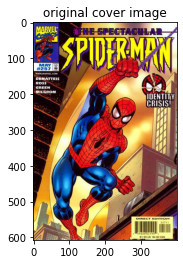

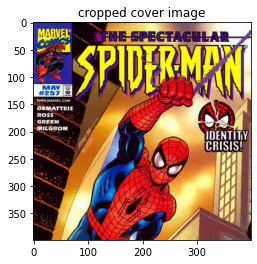

<Figure size 432x288 with 0 Axes>

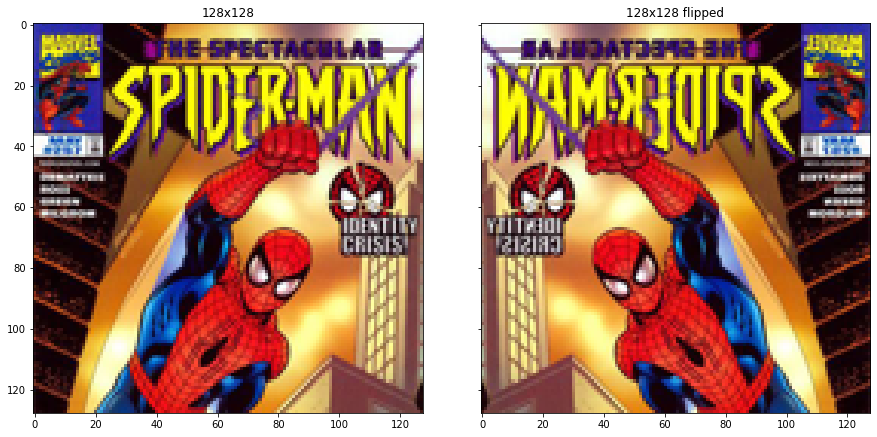

<Figure size 432x288 with 0 Axes>

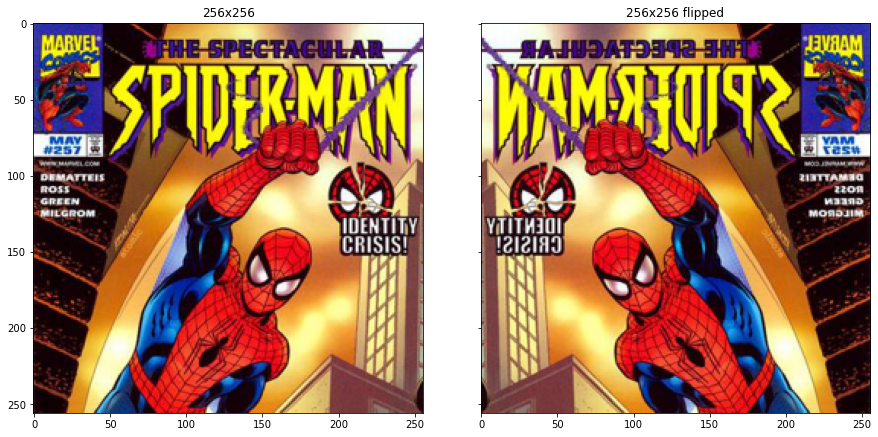

In [12]:
### TESTING ONLY. NOT FOR GRADING ###

from mpl_toolkits.axes_grid1 import ImageGrid

issue = pycomicvine.Issue(44945)
    
# get the issue cover image from URl then convert it to RGB
url = issue.image['medium_url']
response = requests.get(url)
img00 = Image.open(BytesIO(response.content))
imgo = img00.convert('RGB')

plt.imshow(imgo)
plt.title('original cover image')
plt.figure()

# get the 4 images
img = cropping(imgo)
img1 = img.resize((128,128))
img1f = img1.transpose(Image.FLIP_LEFT_RIGHT)
img2 = img.resize((256,256))
img2f = img2.transpose(Image.FLIP_LEFT_RIGHT)

plt.imshow(img)
plt.title('cropped cover image')
plt.figure()
# fig = plt.figure(figsize=(15., 15.))
# grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.8)
# grid[0].imshow(img00)
# grid[0].set_title('Original')
# grid[1].imshow(img)
# grid[1].set_title('Cropped')
# plt.plot()
# plt.figure()

fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.8)
grid[0].imshow(img1)
grid[0].set_title('128x128')
grid[1].imshow(img1f)
grid[1].set_title('128x128 flipped')
plt.plot()
plt.figure()

fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.8)
grid[0].imshow(img2)
grid[0].set_title('256x256')
grid[1].imshow(img2f)
grid[1].set_title('256x256 flipped')
plt.plot()
